In [140]:
var openDigger = require('../src/open_digger');

In [203]:
var startYear = 2015, endYear = 2019;
var startMonth = 1, endMonth = 12;
var years = [];
var months = []
var repo_id = 38066334;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
for (var m = startMonth; m <= endMonth; m++) months.push(m);

12

### 每月新增 Star 和 Frok 的个数

In [204]:
var yms = Array()
for(let i = 0; i < years.length; i++) {
    for (let j = 0; j < months.length; j++) {
        yms.push({'y': years[i], 'm': months[j]});
    }
}

yms_axis = yms.map(ym => ym['y'].toString() + '-' + ym['m'].toString())

[
  '2015-1',  '2015-2',  '2015-3',  '2015-4',  '2015-5',
  '2015-6',  '2015-7',  '2015-8',  '2015-9',  '2015-10',
  '2015-11', '2015-12', '2016-1',  '2016-2',  '2016-3',
  '2016-4',  '2016-5',  '2016-6',  '2016-7',  '2016-8',
  '2016-9',  '2016-10', '2016-11', '2016-12', '2017-1',
  '2017-2',  '2017-3',  '2017-4',  '2017-5',  '2017-6',
  '2017-7',  '2017-8',  '2017-9',  '2017-10', '2017-11',
  '2017-12', '2018-1',  '2018-2',  '2018-3',  '2018-4',
  '2018-5',  '2018-6',  '2018-7',  '2018-8',  '2018-9',
  '2018-10', '2018-11', '2018-12', '2019-1',  '2019-2',
  '2019-3',  '2019-4',  '2019-5',  '2019-6',  '2019-7',
  '2019-8',  '2019-9',  '2019-10', '2019-11', '2019-12'
]

┌─────────┬───────────┬────────────────┬────────────────┐
│ (index) │   time    │ number of star │ number of fork │
├─────────┼───────────┼────────────────┼────────────────┤
│    0    │ '2015-1'  │      '0'       │      '0'       │
│    1    │ '2015-2'  │      '0'       │      '0'       │
│    2    │ '2015-3'  │      '0'       │      '0'       │
│    3    │ '2015-4'  │      '0'       │      '0'       │
│    4    │ '2015-5'  │      '0'       │      '0'       │
│    5    │ '2015-6'  │      '0'       │      '0'       │
│    6    │ '2015-7'  │      '0'       │      '0'       │
│    7    │ '2015-8'  │     '179'      │      '32'      │
│    8    │ '2015-9'  │      '66'      │      '13'      │
│    9    │ '2015-10' │      '26'      │      '14'      │
│   10    │ '2015-11' │      '65'      │      '14'      │
│   11    │ '2015-12' │      '18'      │      '3'       │
│   12    │ '2016-1'  │      '18'      │      '5'       │
│   13    │ '2016-2'  │      '15'      │      '7'       │
│   14    │ '2

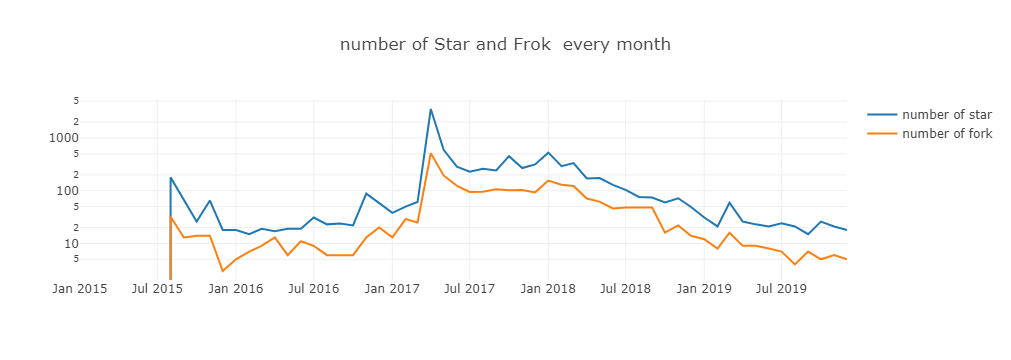

In [205]:
Promise.all(yms.map(ym => {
    var q = `
            SELECT count(CASE WHEN repo_id=${repo_id } AND type='WatchEvent' AND toMonth(created_at)=${ym['m']} THEN 1 ELSE NULL END) AS star,
            count(CASE WHEN repo_id=${repo_id } AND type='ForkEvent' AND toMonth(created_at)=${ym['m']} THEN 1 ELSE NULL END) AS fork
            FROM github_log.year${ym['y']}
            `
    return query(q);
})).then(data => {
    var starCount = [], tableDict = [], forkCount = [];
    data.forEach((d, i) => {
        starCount.push(d[0].star);
        forkCount.push(d[0].fork);
        tableDict.push({'ym': yms_axis[i], 'star': starCount[starCount.length-1], 'fork': forkCount[forkCount.length-1]});
    });
    console.table(tableDict.map((d) => {
        return {
            'time': d.ym,
            'number of star': d.star,
            'number of fork': d.fork,
        };
    }));
    openDigger.render.plotly([
        {x: yms_axis, y: starCount, mode: 'scatter', name: 'number of star'},
        {x: yms_axis, y: forkCount, mode: 'scatter', name: 'number of fork'},
    ], {
        title: 'number of Star and Frok  every month',
        yaxis: {type: 'log'}
    });
    
})

### 每月打开 Issue 和 关闭 Issue 的个数

┌─────────┬───────────┬────────────────────────┬────────────────────────┐
│ (index) │   time    │ number of opened Issue │ number of closed Issue │
├─────────┼───────────┼────────────────────────┼────────────────────────┤
│    0    │ '2015-1'  │          '0'           │          '0'           │
│    1    │ '2015-2'  │          '0'           │          '0'           │
│    2    │ '2015-3'  │          '0'           │          '0'           │
│    3    │ '2015-4'  │          '0'           │          '0'           │
│    4    │ '2015-5'  │          '0'           │          '0'           │
│    5    │ '2015-6'  │          '0'           │          '0'           │
│    6    │ '2015-7'  │          '0'           │          '0'           │
│    7    │ '2015-8'  │          '1'           │          '0'           │
│    8    │ '2015-9'  │          '2'           │          '0'           │
│    9    │ '2015-10' │          '5'           │          '2'           │
│   10    │ '2015-11' │          '6'  

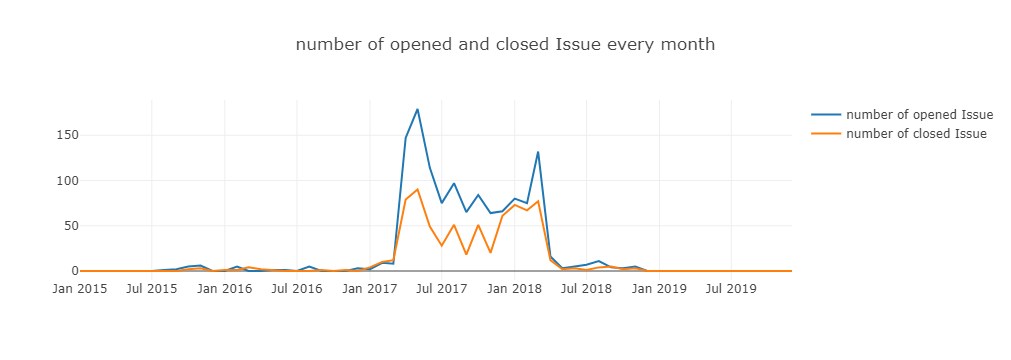

In [211]:
Promise.all(yms.map(ym => {
    var q = `
            SELECT count(CASE WHEN repo_id=${repo_id} AND type='IssuesEvent' AND action='opened' AND toMonth(created_at)=${ym['m']} THEN 1 ELSE NULL END) AS open,
            count(CASE WHEN repo_id=${repo_id} AND type='IssuesEvent' AND action='closed' AND toMonth(created_at)=${ym['m']} THEN 1 ELSE NULL END) AS close
            FROM github_log.year${ym['y']}
            `
    return query(q);
})).then(data => {
    var openCount = [], tableDict = [], closeCount = [];
    data.forEach((d, i) => {
        openCount.push(d[0].open);
        closeCount.push(d[0].close);
        tableDict.push({'ym': yms_axis[i], 'open': openCount[openCount.length-1], 'close': closeCount[closeCount.length-1]});
    });
    console.table(tableDict.map((d) => {
        return {
            'time': d.ym,
            'number of opened Issue': d.open,
            'number of closed Issue': d.close,
        };
    }));
    openDigger.render.plotly([
        {x: yms_axis, y: openCount, mode: 'scatter', name: 'number of opened Issue'},
        {x: yms_axis, y: closeCount, mode: 'scatter', name: 'number of closed Issue'},
    ], {
        title: 'number of opened and closed Issue every month',
    });
    
})

### 每月打开 PR 和合入 PR 的个数（注意，关闭 PR 不等于合入）

┌─────────┬───────────┬─────────────────────┬─────────────────────┐
│ (index) │   time    │ number of opened PR │ number of merged PR │
├─────────┼───────────┼─────────────────────┼─────────────────────┤
│    0    │ '2015-1'  │         '0'         │         '0'         │
│    1    │ '2015-2'  │         '0'         │         '0'         │
│    2    │ '2015-3'  │         '0'         │         '0'         │
│    3    │ '2015-4'  │         '0'         │         '0'         │
│    4    │ '2015-5'  │         '0'         │         '0'         │
│    5    │ '2015-6'  │         '0'         │         '0'         │
│    6    │ '2015-7'  │         '0'         │         '0'         │
│    7    │ '2015-8'  │         '0'         │         '0'         │
│    8    │ '2015-9'  │         '1'         │         '0'         │
│    9    │ '2015-10' │         '1'         │         '1'         │
│   10    │ '2015-11' │         '0'         │         '0'         │
│   11    │ '2015-12' │         '0'         │   

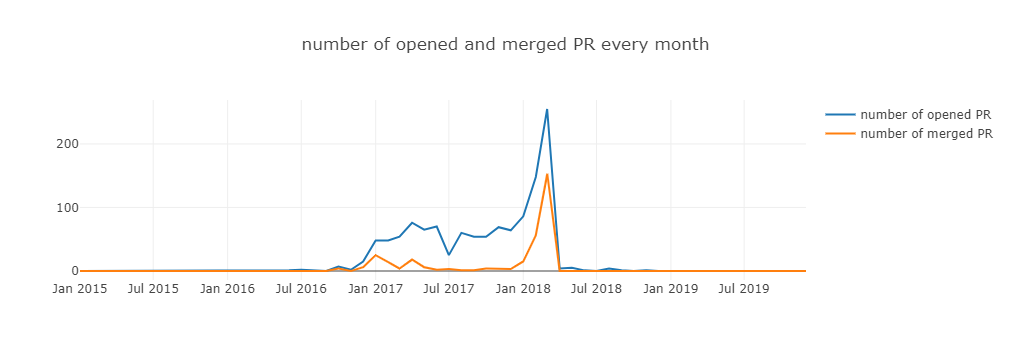

In [218]:
Promise.all(yms.map(ym => {
    var q = `
            SELECT count(CASE WHEN repo_id=${repo_id} AND type='PullRequestEvent' AND action='opened' AND toMonth(created_at)=${ym['m']} THEN 1 ELSE NULL END) AS open,
            count(CASE WHEN repo_id=${repo_id} AND type='PullRequestEvent' AND pull_merged=1 AND toMonth(created_at)=${ym['m']} THEN 1 ELSE NULL END) AS merge
            FROM github_log.year${ym['y']}
            `
    return query(q);
})).then(data => {
    var openCount = [], tableDict = [], mergeCount = [];
    data.forEach((d, i) => {
        openCount.push(d[0].open);
        mergeCount.push(d[0].merge);
        tableDict.push({'ym': yms_axis[i], 'open': openCount[openCount.length-1], 'merge': mergeCount[mergeCount.length-1]});
    });
    console.table(tableDict.map((d) => {
        return {
            'time': d.ym,
            'number of opened PR': d.open,
            'number of merged PR': d.merge,
        };
    }));
    openDigger.render.plotly([
        {x: yms_axis, y: openCount, mode: 'scatter', name: 'number of opened PR'},
        {x: yms_axis, y: mergeCount, mode: 'scatter', name: 'number of merged PR'},
    ], {
        title: 'number of opened and merged PR every month',
    });
    
})

### 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数

┌─────────┬───────────┬────────────────┐
│ (index) │   time    │ number of user │
├─────────┼───────────┼────────────────┤
│    0    │ '2015-1'  │      '0'       │
│    1    │ '2015-2'  │      '0'       │
│    2    │ '2015-3'  │      '1'       │
│    3    │ '2015-4'  │      '3'       │
│    4    │ '2015-5'  │      '2'       │
│    5    │ '2015-6'  │      '4'       │
│    6    │ '2015-7'  │      '2'       │
│    7    │ '2015-8'  │      '3'       │
│    8    │ '2015-9'  │     '6269'     │
│    9    │ '2015-10' │     '459'      │
│   10    │ '2015-11' │     '187'      │
│   11    │ '2015-12' │     '130'      │
│   12    │ '2016-1'  │     '143'      │
│   13    │ '2016-2'  │     '246'      │
│   14    │ '2016-3'  │     '185'      │
│   15    │ '2016-4'  │     '160'      │
│   16    │ '2016-5'  │     '4334'     │
│   17    │ '2016-6'  │     '1170'     │
│   18    │ '2016-7'  │     '1110'     │
│   19    │ '2016-8'  │     '316'      │
│   20    │ '2016-9'  │     '291'      │
│   21    │ '201

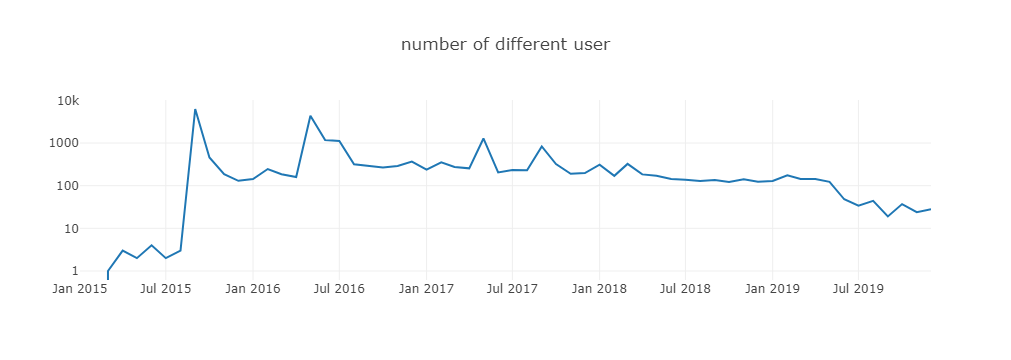

In [219]:
Promise.all(yms.map(ym => {
    var q = `
            SELECT COUNT(DISTINCT actor_id) as user
            FROM github_log.year${ym['y']}
            WHERE repo_id='32665718' AND toMonth(created_at)=${ym['m']}
            `
    return query(q);
})).then(data => {
    var userCount = [], tableDict = [];
    data.forEach((d, i) => {
        userCount.push(d[0].user);
        tableDict.push({'ym': yms_axis[i], 'user': userCount[userCount.length-1]});
    });
    console.table(tableDict.map((d) => {
        return {
            'time': d.ym,
            'number of user': d.user,
        };
    }));
    openDigger.render.plotly([
        {x: yms_axis, y: userCount, mode: 'scatter', name: 'number of user'},
    ], {
        title: 'number of different user',
        yaxis: {type: 'log'}
    });
    
})

### Issue 从打开到关闭的平均时长和中位数（单位：天）

In [220]:
query(
    `SELECT avg(duration) as avg, quantile(0.5)(duration) as medium FROM (
        SELECT toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at) AS duration FROM github_log.year2015 WHERE repo_id=${repo_id} AND type='IssuesEvent' AND duration>=0
        UNION ALL
        SELECT toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at) AS duration FROM github_log.year2016 WHERE repo_id=${repo_id} AND type='IssuesEvent' AND duration>=0
        UNION ALL
        SELECT toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at) AS duration FROM github_log.year2017 WHERE repo_id=${repo_id} AND type='IssuesEvent' AND duration>=0
        UNION ALL
        SELECT toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at) AS duration FROM github_log.year2018 WHERE repo_id=${repo_id} AND type='IssuesEvent' AND duration>=0
    
    )`
).then(res => {console.log(res[0]);})

{ avg: 34.53658536585366, medium: 4 }


### PR 从打开到合入的平均时长和中位数（单位：天）

In [221]:
query(
    `SELECT avg(duration) as avg, quantile(0.5)(duration) as medium FROM (
        SELECT intDiv(minus(max(created_at), min(created_at))/3600, 24) AS duration FROM (
            SELECT issue_id, action, created_at FROM github_log.year2015 WHERE repo_id=${repo_id} AND type='PullRequestEvent'
            UNION ALL
            SELECT issue_id, action, created_at FROM github_log.year2016 WHERE repo_id=${repo_id} AND type='PullRequestEvent'
            UNION ALL
            SELECT issue_id, action, created_at FROM github_log.year2017 WHERE repo_id=${repo_id} AND type='PullRequestEvent'
            UNION ALL
            SELECT issue_id, action, created_at FROM github_log.year2018 WHERE repo_id=${repo_id} AND type='PullRequestEvent'
        ) GROUP BY issue_id
    )`
).then(res => {console.log(res[0]);})

{ avg: 17.87269815852682, medium: 0 }


### Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [223]:
query(
    `SELECT avg(duration) as avg, quantile(0.5)(duration) as medium FROM (
        SELECT minus(toRelativeDayNum(min(issue_comment_created_at)), toRelativeDayNum(min(issue_created_at))) AS duration  FROM (
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2015 WHERE repo_id=${repo_id}  AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id
            UNION ALL
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2016 WHERE repo_id=${repo_id}  AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id
            UNION ALL
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2017 WHERE repo_id=${repo_id}  AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id
            UNION ALL
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2018 WHERE repo_id=${repo_id}  AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id
        ) GROUP BY issue_id
    )`
).then(res => {console.log(res[0]);})

{ avg: 13.78107502799552, medium: 0 }


### 根据你观察到的仓库的历史数据，尝试找到几个你认为关键或值得注意的时间节点

1. caffe2在2017年发展迅速，每月star和fork的数量每月都有上百数量，尤其在2017年4月，fork 和star数量达到历来最高(513,3546)
2. 同样，在2017年，Issue相关的数量也在增加，说明在当时是非常欢迎的。每月 打开 Issue 和 关闭 Issue 的个数 的数量每月几十到几百不等。
3. 通过相关资料查询，在2018年，caffe2被合并到pytorch，caffe2仓库被归档，此后与该仓库人员数量减少。https://pytorchchina.com/2018/05/03/
4. 虽然在2018年归档，但是，从活跃在该仓库的开发者总数来看，仍然有相关开发者在做caffe2的相关工作。
   